# Data Assessment & Analytics for Water Right and Time Series Water Use
Notes:
- change os directory location
- be aware of the number of provdied native source data files
- beware of of what data is available

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import geoplot as gplt  # for plotting maps and geo-data
import geoplot.crs as gcrs  #used to pull in webdata related to maps and geo-data
import missingno as msno # creates a matrix chart to show missing values
import plotly.express as px
import plotly.graph_objects as go  # for subplot creation
from plotly.subplots import make_subplots  # for subplot creation
import matplotlib.pyplot as mplt  # use with gplt to save fig to pdf

# ---- cleanup ----
import re # string regular expression manipulation
from datetime import datetime # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = os.getcwd() # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: C:\Users\rjame\Documents\WSWC Documents\MappingStatesDataToWaDE2.0\California\WaterAllocation_WaterUse_CSWRCB


In [3]:
# ---- where to find input files ----
InputFolderString = "G:/Shared drives/WaDE Data/California/WaterAllocation_WaterUse_CSWRCB" # set this to where input files are located

In [4]:
# Native Input Data
#################################################################
# ---- This needs to be custom per state ----

# Data Set 1: ewrims_flat_file_pod
dfin1 = pd.read_csv(InputFolderString + '/RawinputData/ewrims_flat_file_pod.zip')

# Data Set 2: water-rights-water-use-reported-short
dfin2 = pd.read_csv(InputFolderString + '/RawinputData/water-rights-water-use-reported-short.zip')

C:\Users\rjame\AppData\Local\Temp\ipykernel_15472\4220610348.py:6: DtypeWarning: Columns (7,13,42,49,59,61,66,72,74,88,89,91,94,96,98,103,105,110,121,126,132,133,146,147,148,150,151,153,154,155,156,157,158,159,160,161,162,163,166,167,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  dfin1 = pd.read_csv(InputFolderString + '/RawinputData/ewrims_flat_file_pod.zip')


In [5]:
# WaDE Processed Input Data
#################################################################

dfm = pd.read_csv(InputFolderString + "/ProcessedInputData/methods.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfv = pd.read_csv(InputFolderString + "/ProcessedInputData/variables.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfo = pd.read_csv(InputFolderString + "/ProcessedInputData/organizations.csv", encoding = "ISO-8859-1").replace(np.nan, "")

dfws = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources.csv").replace(np.nan, "")
dfwspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/watersources_missing.csv").replace(np.nan, "")

dfs = pd.read_csv(InputFolderString + "/ProcessedInputData/sites.csv").replace(np.nan, "")
dfspurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sites_missing.csv").replace(np.nan, "")

dfaa = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations.csv").replace(np.nan, "")
dfaapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/waterallocations_missing.csv").replace(np.nan, "")

dfsa = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts.csv").replace(np.nan, "")
dfsapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts_missing.csv").replace(np.nan, "")

C:\Users\rjame\AppData\Local\Temp\ipykernel_15472\2624352394.py:20: DtypeWarning: Columns (3,27) have mixed types. Specify dtype option on import or set low_memory=False.
  dfsapurge = pd.read_csv(InputFolderString + "/ProcessedInputData/sitespecificamounts_missing.csv").replace(np.nan, "")


# Water Source Info (watersources.csv)

In [6]:
print(len(dfws))
dfws.head(1)

8313


WaterSourceUUID Geometry GNISFeatureNameCV WaterQualityIndicatorCV  \
0  CSWRCBwr_WSwadeId1                                              Fresh   

  WaterSourceName WaterSourceNativeID WaterSourceTypeCV  
0  Unnamed Stream             wadeId1     Surface Water

<Axes: >

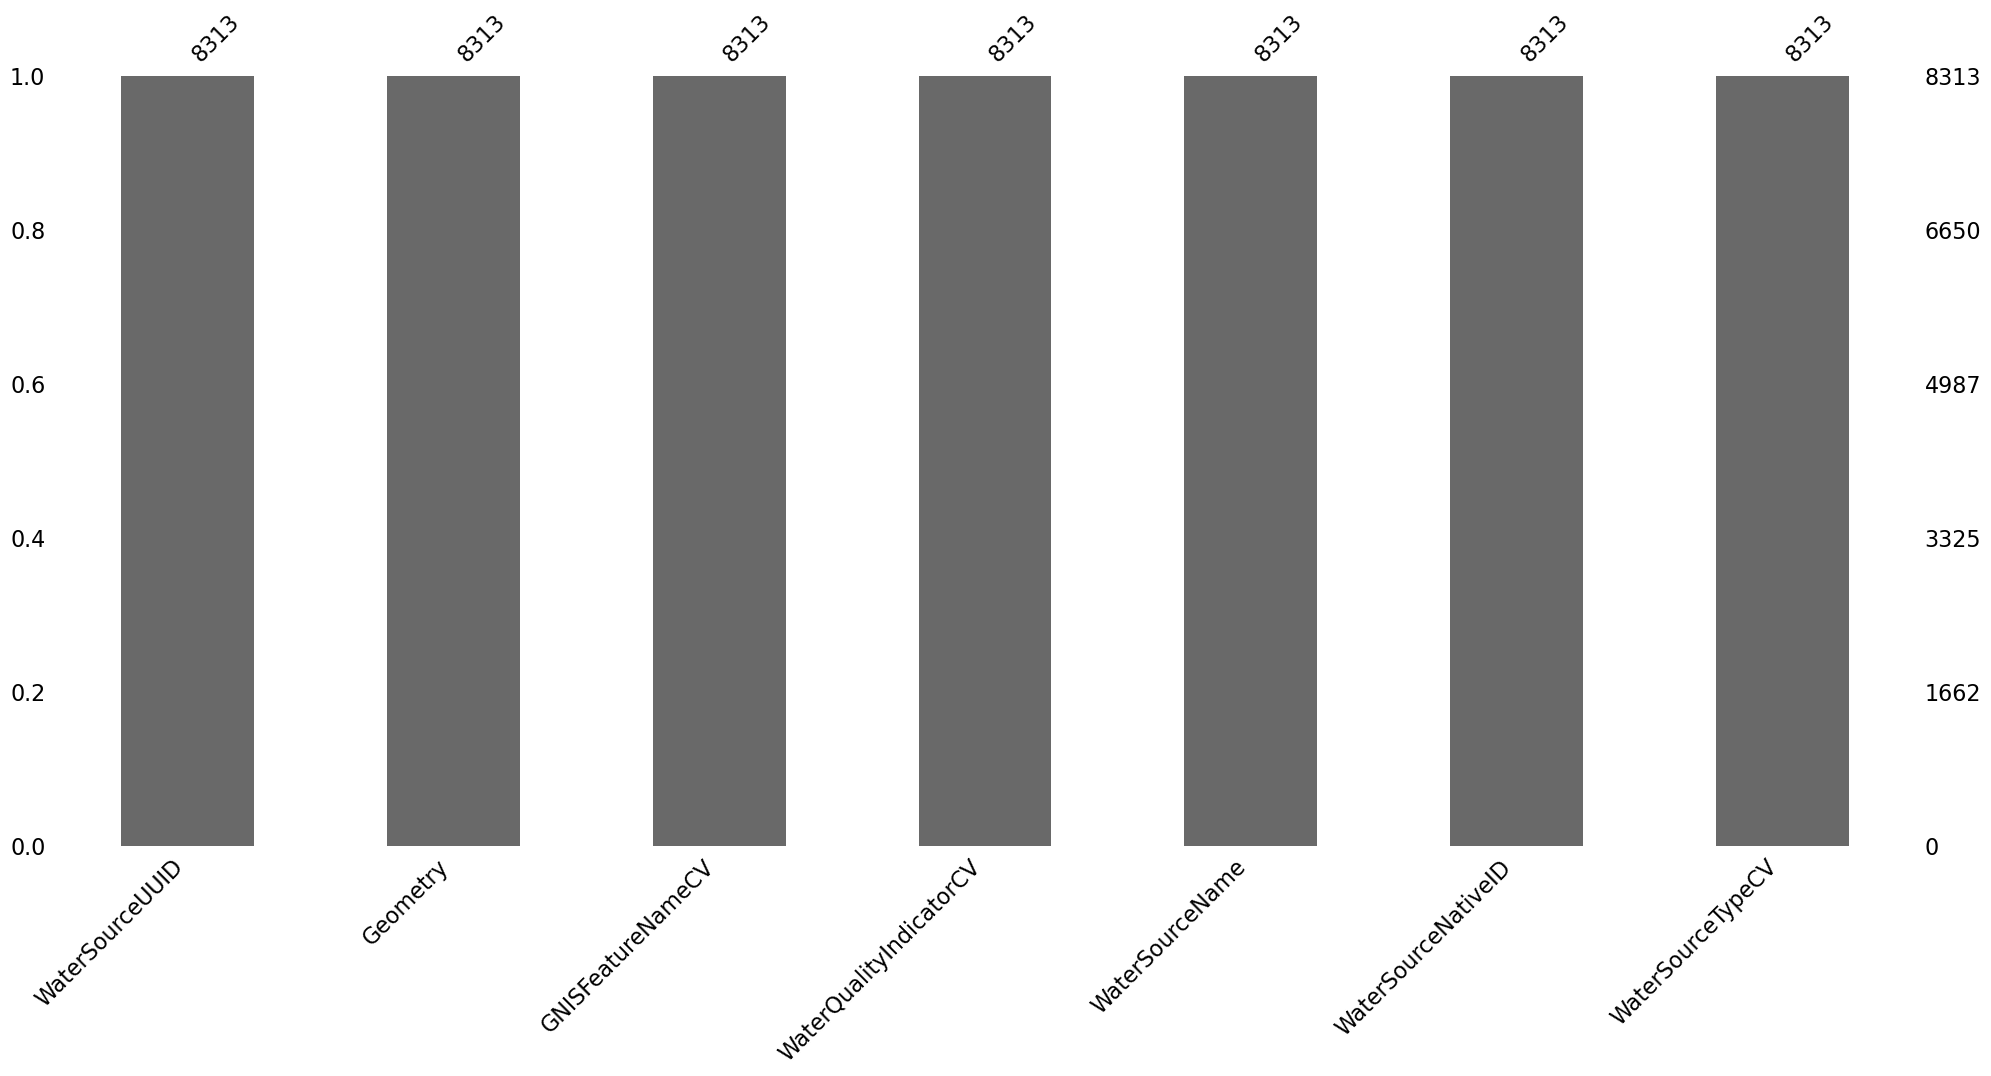

In [7]:
# Check what columns contain missing information.
msno.bar(dfws)

In [8]:
# Unique values for 'WaterSourceTypeCV'
for x in dfws['WaterSourceTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Surface Water",
"Unspecified",


# Site Info (sites.csv)

In [9]:
print(len(dfs))
dfs.head(1)

47786


SiteUUID RegulatoryOverlayUUIDs     WaterSourceUUIDs CoordinateAccuracy  \
0  CSWRCBwr_S1          CAre_RO100802  CSWRCBwr_WSwadeId21         WaDE Blank   

  CoordinateMethodCV    County  EPSGCodeCV Geometry GNISCodeCV       HUC12  \
0          GIS_CLICK  Humboldt        4326                     -2147483648   

       HUC8  Latitude  Longitude NHDNetworkStatusCV NHDProductCV PODorPOUSite  \
0  18010102  40.96310 -124.10000                                          POD   

     SiteName  SiteNativeID SitePoint                 SiteTypeCV StateCV  \
0  WaDE Blank             1            Point Of Direct Diversion      CA   

  USGSSiteID      WaterSourceUUID WaterSourceTypeCV  
0             CSWRCBwr_WSwadeId21       Unspecified

<Axes: >

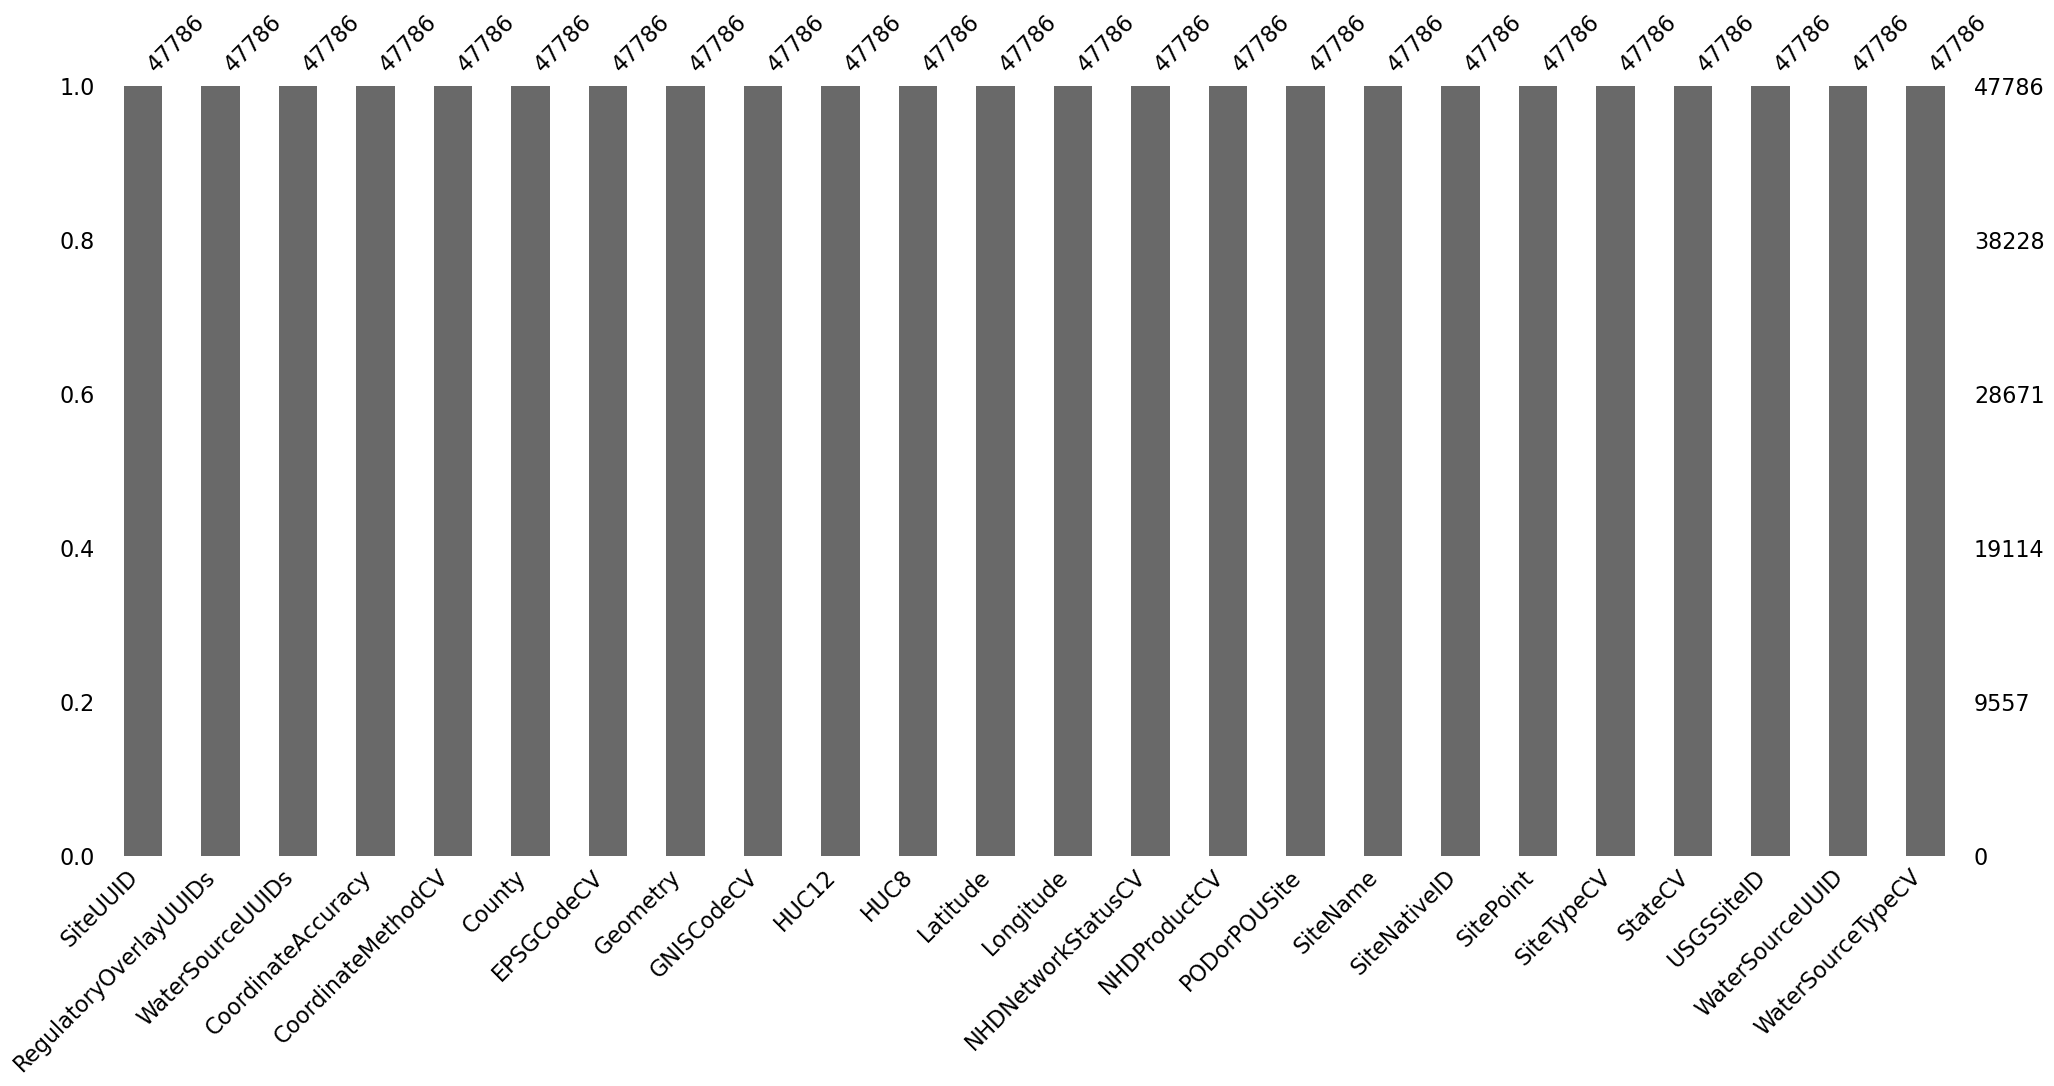

In [10]:
# Check what columns contain missing information.
msno.bar(dfs)

In [11]:
# Unique values for 'CoordinateMethodCV'
for x in dfs['CoordinateMethodCV'].sort_values().unique():
    print(f'"' + x + '",')

"DD_NE",
"DD_QQS",
"DD_QS",
"DD_S",
"GIS_BDO",
"GIS_CLICK",
"GIS_DDO",
"GIS_LL",
"GIS_NE",
"GIS_UTM",


In [12]:
# Unique values for 'SiteTypeCV'
for x in dfs['SiteTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Movable Point Of Diversion",
"Movable Point Of Rediversion",
"Point Of Direct Diversion",
"Point Of Diversion To Offstream Storage",
"Point Of Diversion To Underground Storage",
"Point Of Onstream Storage",
"Point Of Rediversion",
"Point Of Storage - Unspecified",
"WaDE Blank",


# Allocation Amount Info (waterallocations.csv)

In [13]:
print(len(dfaa))
dfaa.head(1)

41342


AllocationUUID   MethodUUID OrganizationUUID  \
0  CSWRCBwr_WRA000016  CSWRCBwr_M1      CSWRCBwr_O1   

                                            SiteUUID VariableSpecificUUID  \
0  CSWRCBwr_S17603,CSWRCBwr_S404,CSWRCBwr_S29028,...          CSWRCBwr_V1   

  AllocationApplicationDate AllocationAssociatedConsumptiveUseSiteIDs  \
0                                                                       

  AllocationAssociatedWithdrawalSiteIDs AllocationBasisCV  \
0                                              WaDE Blank   

  AllocationChangeApplicationIndicator AllocationCommunityWaterSupplySystem  \
0                                                                             

  AllocationCropDutyAmount AllocationExpirationDate  AllocationFlow_CFS  \
0                                                               0.00000   

  AllocationLegalStatusCV AllocationNativeID         AllocationOwner  \
0                Licensed            A000016  Lilac Hills Estates Lp   

  AllocationPriorityDate AllocationSDWISIdentifierCV AllocationTimeframeEnd  \
0                                                                    31-Dec   

  AllocationTimeframeStart AllocationTypeCV  AllocationVolume_AF  \
0                    1-Jan    Appropriative              0.00000   

  BeneficialUseCategory CommunityWaterSupplySystem CropTypeCV CustomerTypeCV  \
0              Domestic                                                        

  DataPublicationDate DataPublicationDOI  ExemptOfVolumeFlowPriority  \
0          01/31/2024                                              1   

  GeneratedPowerCapacityMW  IrrigatedAcreage IrrigationMethodCV  \
0                                    0.00000                      

  LegacyAllocationIDs OwnerClassificationCV PopulationServed PowerType  \
0                                   Private                              

  PrimaryBeneficialUseCategory  \
0                     Domestic   

                            WaterAllocationNativeURL  
0  https://ciwqs.waterboards.ca.gov/ciwqs/ewrims/...

<Axes: >

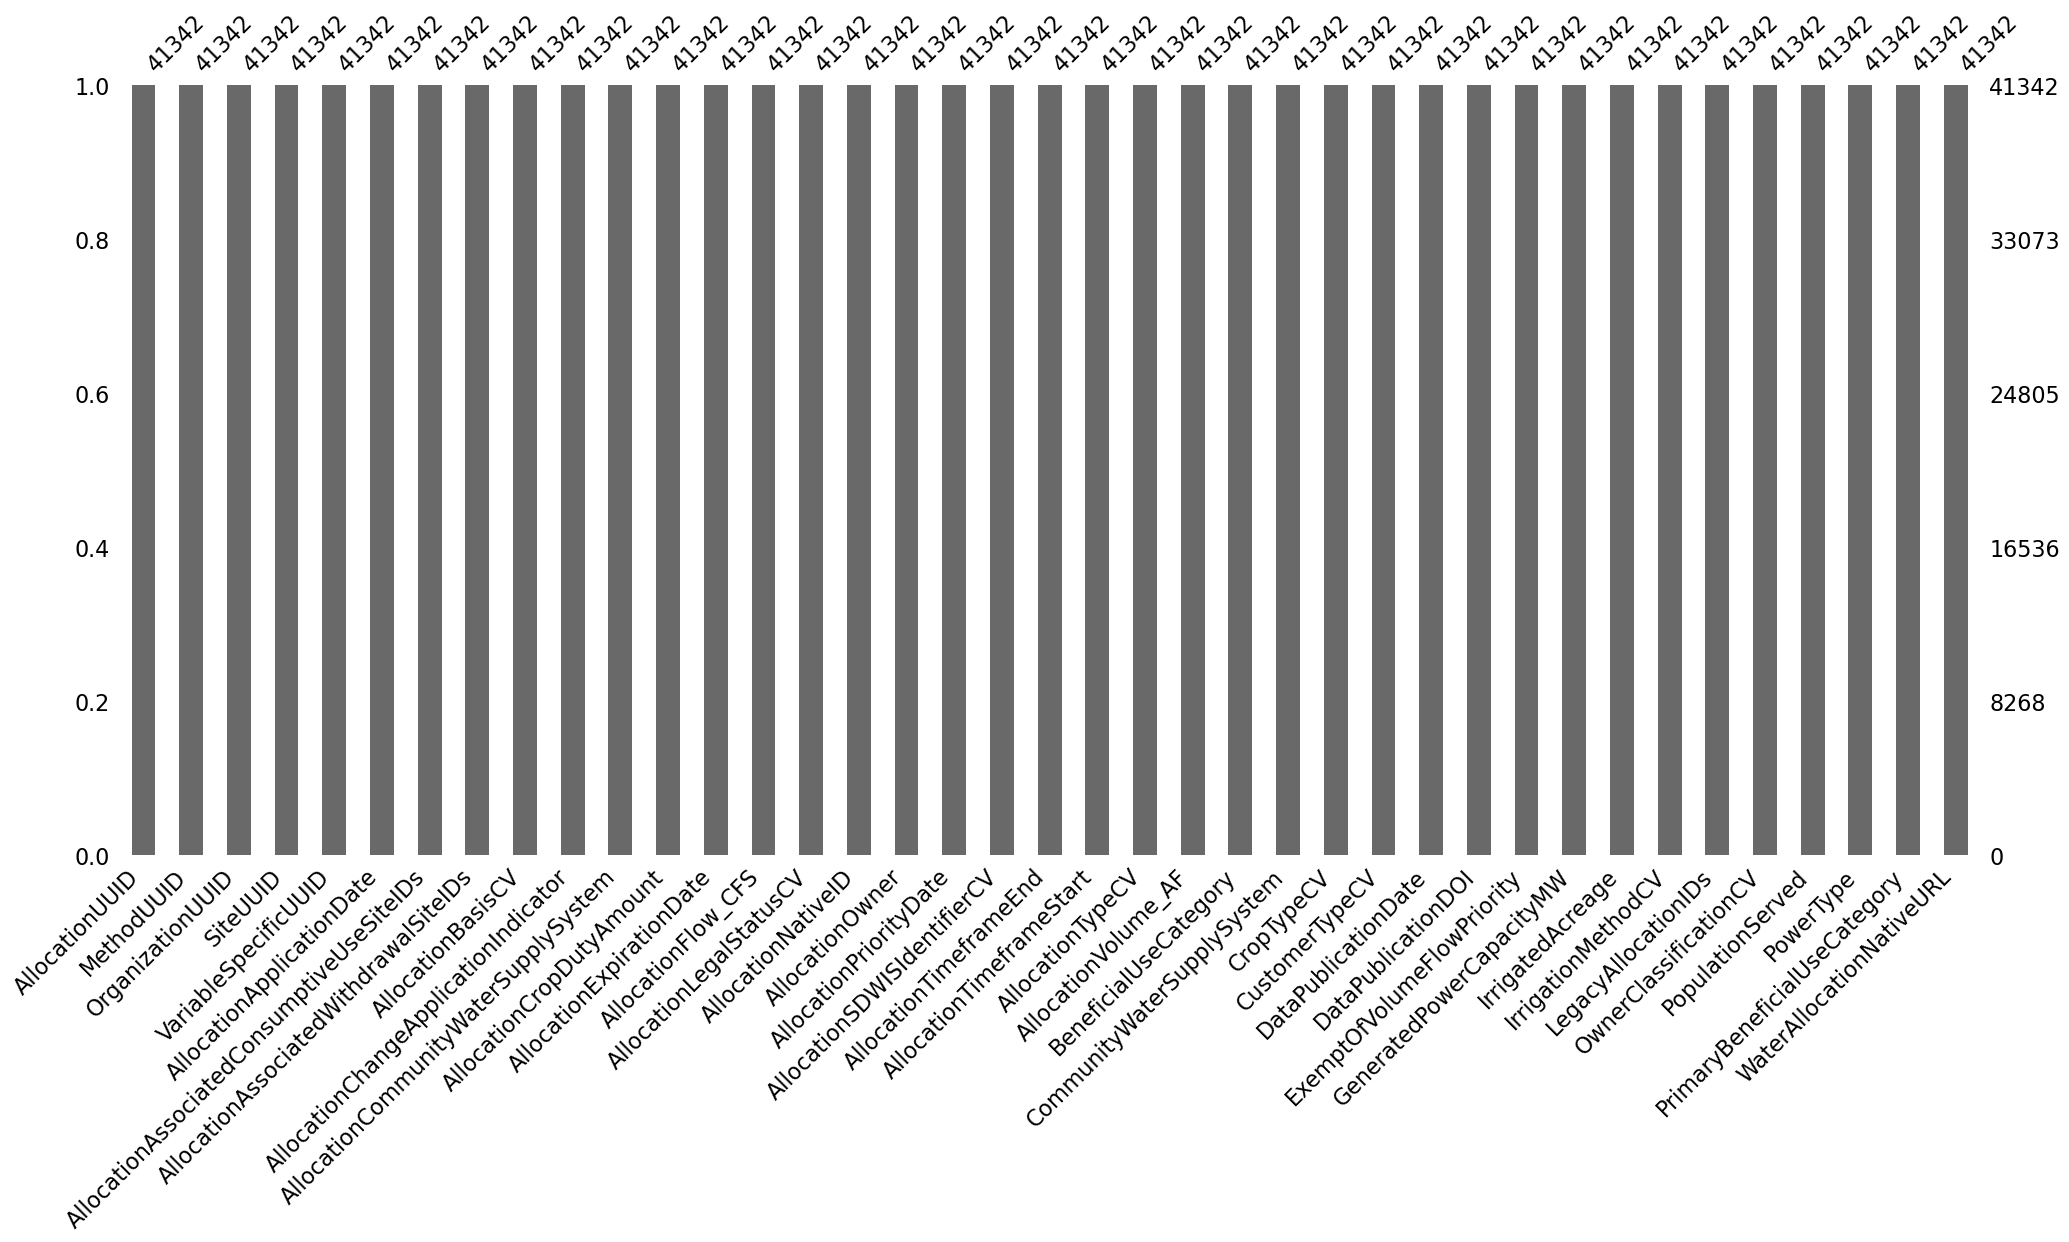

In [14]:
# Check what columns contain missing information.
msno.bar(dfaa)

In [15]:
# Unique values for 'AllocationBasisCV'
for x in dfaa['AllocationBasisCV'].sort_values().unique():
    print(f'"' + str(x) + '",')

"WaDE Blank",


In [16]:
# Unique values for 'AllocationTypeCV'
for x in dfaa['AllocationTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"Adjudicated",
"Appropriative",
"Cert of Right - Power",
"Federal Claims",
"Federal Stockponds",
"Groundwater Recordation",
"Non Jurisdictional",
"Not Determined",
"Registration Cannabis",
"Registration Domestic",
"Registration Irrigation",
"Registration Livestock",
"Section 12 File",
"Statement of Div and Use",
"Statement of Div and Use COURTADJ",
"Statement of Div and Use COURTADJ OTHER",
"Statement of Div and Use OTHER",
"Statement of Div and Use PENDING",
"Statement of Div and Use PENDING OTHER",
"Statement of Div and Use PRE1914",
"Statement of Div and Use PRE1914 COURTADJ",
"Statement of Div and Use PRE1914 COURTADJ OTHER",
"Statement of Div and Use PRE1914 OTHER",
"Statement of Div and Use RIPERIAN",
"Statement of Div and Use RIPERIAN COURTADJ",
"Statement of Div and Use RIPERIAN COURTADJ OTHER",
"Statement of Div and Use RIPERIAN OTHER",
"Statement of Div and Use RIPERIAN PENDING",
"Statement of Div and Use RIPERIAN PENDING OTHER",
"Statement of Div and Use RIPERIAN PRE1914",
"

In [17]:
# Unique values for 'AllocationLegalStatusCV'
for x in dfaa['AllocationLegalStatusCV'].sort_values().unique():
    print(f'"' + x + '",')

"Active",
"Adjudicated",
"Certified",
"Claimed",
"Claimed - Local Oversight",
"Completed",
"Licensed",
"Permitted",
"Registered",
"WaDE Blank",


In [18]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfaa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Aesthetic',
 'Aquaculture',
 'Domestic',
 'Dust Control',
 'Fire Protection',
 'Fish And Wildlife Preservation And Enhancement',
 'Frost Protection',
 'Heat Control',
 'Incidental Power',
 'Industrial',
 'Irrigation',
 'Milling',
 'Mining',
 'Municipal',
 'Other',
 'Power',
 'Recreational',
 'Snow Making',
 'Stockwatering',
 'Unspecified',
 'Water Quality']

In [19]:
# Unique values for 'OwnerClassificationCV'
for x in dfaa['OwnerClassificationCV'].sort_values().unique():
    print(f'"' + x + '",')

"Bureau Reclamation (USBR)",
"Bureau of Indian Affairs (USBIA)",
"Bureau of Land Management (USBLM)",
"Fish and Wildlife Service (USFWS)",
"Forest Service (USFS)",
"Military",
"National Park Service (USNPS)",
"Native American",
"Private",
"Reclamation Contractor",
"United States of America",


# Site-Specific Amount Info (sitespecificamounts.csv)

In [20]:
print(len(dfsa))
dfsa.head(1)

1973879


MethodUUID OrganizationUUID         SiteUUID VariableSpecificUUID  \
0  CSWRCBwr_M1      CSWRCBwr_O1  CSWRCBwr_S28034          CSWRCBwr_V4   

      WaterSourceUUID     Amount AllocationCropDutyAmount  \
0  CSWRCBwr_WSwadeId7 3270.00000                            

  AssociatedNativeAllocationIDs BeneficialUseCategory  \
0                       A000018            Irrigation   

  CommunityWaterSupplySystem CropTypeCV CustomerTypeCV DataPublicationDate  \
0                                                               02/01/2024   

  DataPublicationDOI Geometry IrrigatedAcreage IrrigationMethodCV  \
0                                                                   

  PopulationServed PowerGeneratedGWh PowerType      PrimaryUseCategory  \
0                                               Agriculture Irrigation   

   ReportYearCV SDWISIdentifier TimeframeEnd TimeframeStart WaDEUUID  
0          2008                   2008-04-01     2008-04-01

<Axes: >

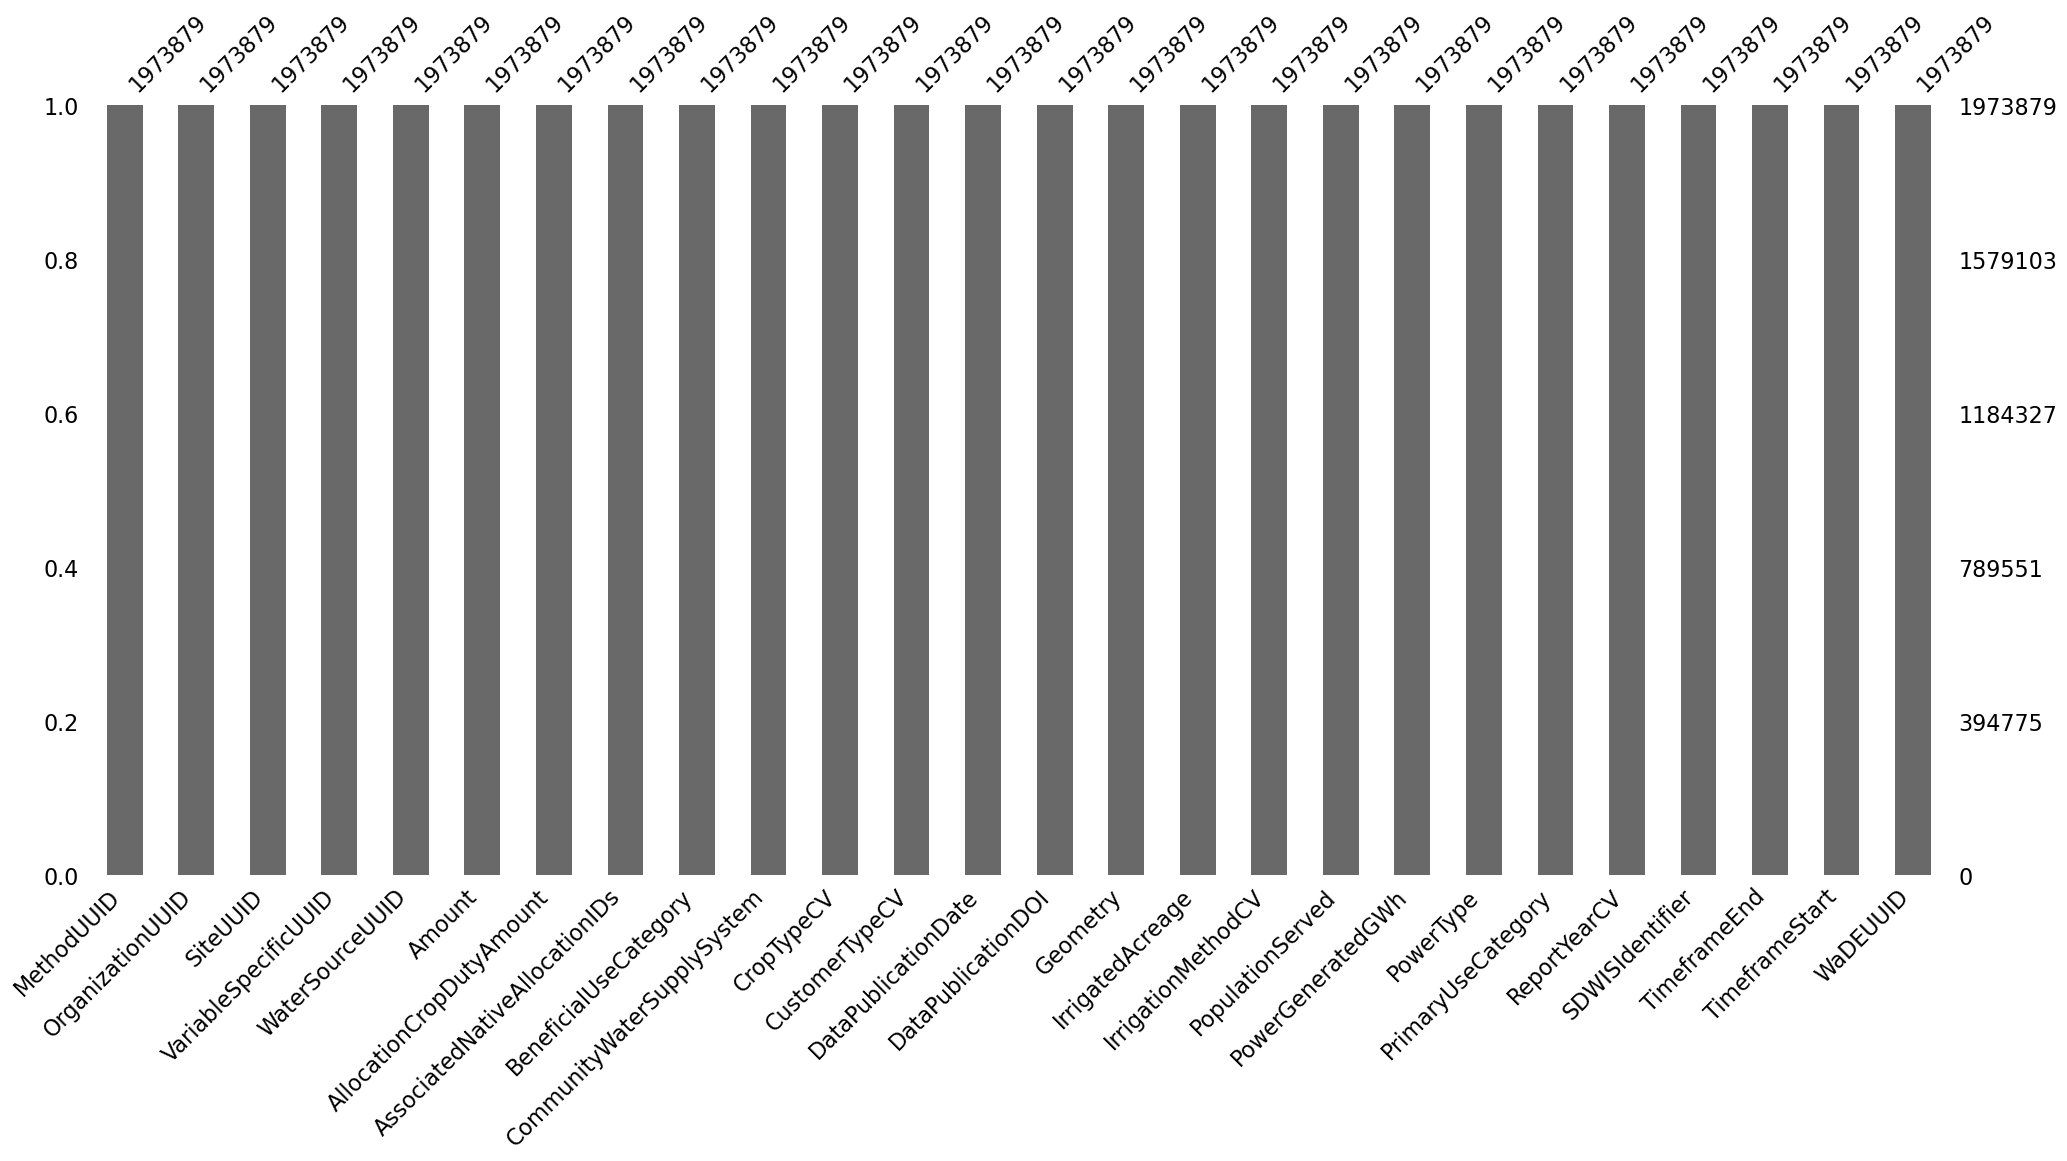

In [21]:
# Check what columns contain missing information.
msno.bar(dfsa)

In [22]:
# Unique values for 'BeneficialUseCategory'
uniqueList = list(set([i.strip() for i in ','.join(dfsa['BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Aesthetic',
 'Aquaculture',
 'Domestic',
 'Dust Control',
 'Fire Protection',
 'Fish And Wildlife Preservation And Enhancement',
 'Frost Protection',
 'Heat Control',
 'Incidental Power',
 'Industrial',
 'Irrigation',
 'Milling',
 'Mining',
 'Municipal',
 'Other',
 'Power',
 'Recreational',
 'Snow Making',
 'Stockwatering',
 'Unspecified']

In [23]:
# Unique values for 'in_CropTypeCV'
for x in dfsa['CropTypeCV'].sort_values().unique():
    print(f'"' + x + '",')

"",


In [24]:
# Unique values for 'in_CustomerTypeCV'
for x in dfsa['CustomerTypeCV'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"",


In [25]:
# Unique values for 'in_PopulationServed'
for x in dfsa['PopulationServed'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"",


In [26]:
# Unique values for 'in_ReportYearCV'
for x in dfsa['ReportYearCV'].astype(str).sort_values().unique():
    print(f'"' + x + '",')

"1906",
"1913",
"1915",
"1916",
"1959",
"1963",
"1975",
"1976",
"1986",
"1987",
"1988",
"1989",
"1990",
"1991",
"1992",
"1993",
"1994",
"1995",
"1996",
"1997",
"1998",
"1999",
"2000",
"2001",
"2002",
"2003",
"2004",
"2005",
"2006",
"2007",
"2008",
"2009",
"2010",
"2011",
"2012",
"2013",
"2014",
"2015",
"2016",
"2017",
"2018",
"2019",
"2020",
"2021",
"2022",


## Markdown Table Creation

In [27]:
# method.csv
try:
  dftmp = dfm.loc[[1]].drop(['MethodDescription'], axis=1).copy().to_markdown()
except:
  dftmp = dfm.drop(['MethodDescription'], axis=1).copy().to_markdown()
print(dftmp)

|    | MethodUUID   | ApplicableResourceTypeCV      | DataConfidenceValue   | DataCoverageValue   | DataQualityValueCV   | MethodName                     | MethodNEMILink                                                               | MethodTypeCV    | WaDEDataMappingUrl                                                                                                         |
|---:|:-------------|:------------------------------|:----------------------|:--------------------|:---------------------|:-------------------------------|:-----------------------------------------------------------------------------|:----------------|:---------------------------------------------------------------------------------------------------------------------------|
|  0 | CSWRCBwr_M1  | Surface Water and Groundwater |                       |                     |                      | California Water Rights Method | https://www.waterboards.ca.gov/waterrights/board_info/faqs.html#toc178761079 | Legal Pro

In [28]:
# variable.csv
try:
  dftmp = dfv.loc[[1]].copy().to_markdown()
except:
  dftmp = dfv.copy().to_markdown()
print(dftmp)

|    | VariableSpecificUUID   |   AggregationInterval | AggregationIntervalUnitCV   | AggregationStatisticCV   | AmountUnitCV   | MaximumAmountUnitCV   |   ReportYearStartMonth | ReportYearTypeCV   | VariableCV   | VariableSpecificCV   |
|---:|:-----------------------|----------------------:|:----------------------------|:-------------------------|:---------------|:----------------------|-----------------------:|:-------------------|:-------------|:---------------------|
|  1 | CSWRCBwr_V2            |                     1 | Year                        | Average                  | AF             | AF                    |                      1 | CalendarYear       | Allocation   | Allocation           |


In [29]:
# organizations.csv
try:
  dftmp = dfo.loc[[1]].copy().to_markdown()
except:
  dftmp = dfo.copy().to_markdown()
print(dftmp)

|    | OrganizationUUID   | OrganizationContactEmail          | OrganizationContactName   | OrganizationName                               | OrganizationPhoneNumber   | OrganizationPurview                                                                                                                                                                                | OrganizationWebsite             | State   |
|---:|:-------------------|:----------------------------------|:--------------------------|:-----------------------------------------------|:--------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------|:--------|
|  0 | CSWRCBwr_O1        | Greg.Gearheart@waterboards.ca.gov | Greg Gearheart            | California State Water Resources Control Board | 916-341-5892              | The Electro

In [30]:
# watersources.csv
try:
  dftmp = dfws.loc[[1]].copy().to_markdown()
except:
  dftmp = dfws.copy().to_markdown()
print(dftmp)

|    | WaterSourceUUID     | Geometry   | GNISFeatureNameCV   | WaterQualityIndicatorCV   | WaterSourceName   | WaterSourceNativeID   | WaterSourceTypeCV   |
|---:|:--------------------|:-----------|:--------------------|:--------------------------|:------------------|:----------------------|:--------------------|
|  1 | CSWRCBwr_WSwadeId10 |            |                     | Fresh                     | Witcher Creek     | wadeId10              | Unspecified         |


In [31]:
# sites.csv
try:
  dftmp = dfs.loc[[1]].drop(['Geometry'], axis=1).copy().to_markdown()
except:
  dftmp = dfs.drop(['Geometry'], axis=1).copy().to_markdown()
print(dftmp)

|    | SiteUUID     | RegulatoryOverlayUUIDs   | WaterSourceUUIDs    | CoordinateAccuracy   | CoordinateMethodCV   | County   |   EPSGCodeCV | GNISCodeCV   |       HUC12 |     HUC8 |   Latitude |   Longitude | NHDNetworkStatusCV   | NHDProductCV   | PODorPOUSite   | SiteName   |   SiteNativeID | SitePoint   | SiteTypeCV                | StateCV   | USGSSiteID   | WaterSourceUUID     | WaterSourceTypeCV   |
|---:|:-------------|:-------------------------|:--------------------|:---------------------|:---------------------|:---------|-------------:|:-------------|------------:|---------:|-----------:|------------:|:---------------------|:---------------|:---------------|:-----------|---------------:|:------------|:--------------------------|:----------|:-------------|:--------------------|:--------------------|
|  1 | CSWRCBwr_S10 |                          | CSWRCBwr_WSwadeId21 | WaDE Blank           | DD_NE                | Plumas   |         4326 |              | -2147483648 | 18020121

In [32]:
# waterallocations.csv
try:
  dftmp = dfaa.loc[[1]].copy().to_markdown()
except:
  dftmp = dfaa.copy().to_markdown()
print(dftmp)

|    | AllocationUUID     | MethodUUID   | OrganizationUUID   | SiteUUID                                        | VariableSpecificUUID   | AllocationApplicationDate   | AllocationAssociatedConsumptiveUseSiteIDs   | AllocationAssociatedWithdrawalSiteIDs   | AllocationBasisCV   | AllocationChangeApplicationIndicator   | AllocationCommunityWaterSupplySystem   | AllocationCropDutyAmount   | AllocationExpirationDate   |   AllocationFlow_CFS | AllocationLegalStatusCV   | AllocationNativeID   | AllocationOwner                 | AllocationPriorityDate   | AllocationSDWISIdentifierCV   | AllocationTimeframeEnd   | AllocationTimeframeStart   | AllocationTypeCV   |   AllocationVolume_AF | BeneficialUseCategory   | CommunityWaterSupplySystem   | CropTypeCV   | CustomerTypeCV   | DataPublicationDate   | DataPublicationDOI   |   ExemptOfVolumeFlowPriority | GeneratedPowerCapacityMW   |   IrrigatedAcreage | IrrigationMethodCV   | LegacyAllocationIDs   | OwnerClassificationCV   | PopulationServed   | 

In [33]:
# sitespecificamounts.csv
try:
  dftmp = dfsa.loc[[1]].copy().to_markdown()
except:
  dftmp = dfsa.copy().to_markdown()
print(dftmp)

|    | MethodUUID   | OrganizationUUID   | SiteUUID        | VariableSpecificUUID   | WaterSourceUUID    |   Amount | AllocationCropDutyAmount   | AssociatedNativeAllocationIDs   | BeneficialUseCategory   | CommunityWaterSupplySystem   | CropTypeCV   | CustomerTypeCV   | DataPublicationDate   | DataPublicationDOI   | Geometry   | IrrigatedAcreage   | IrrigationMethodCV   | PopulationServed   | PowerGeneratedGWh   | PowerType   | PrimaryUseCategory     |   ReportYearCV | SDWISIdentifier   | TimeframeEnd   | TimeframeStart   | WaDEUUID   |
|---:|:-------------|:-------------------|:----------------|:-----------------------|:-------------------|---------:|:---------------------------|:--------------------------------|:------------------------|:-----------------------------|:-------------|:-----------------|:----------------------|:---------------------|:-----------|:-------------------|:---------------------|:-------------------|:--------------------|:------------|:-----------------------

## Num of Record Summary

In [34]:
# Num of entries of source data
print(f"Num of Source #1 Entries (rows): ", "|", len(dfin1))
print(f"Num of Source #2 Entries (rows): ", "|", len(dfin2))

Num of Source #1 Entries (rows):  | 64873
Num of Source #2 Entries (rows):  | 11731056


In [35]:
# Num of entries compiled into WaDE
podString =  len(dfs[dfs['PODorPOUSite'] == 'POD'])
pouString=  len(dfs[dfs['PODorPOUSite'] == 'POU'])
aaString = len(dfaa)
saString = len(dfsa)
print("Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records | Num of Identified Water Use Records")
print("**Compiled WaDE Data** |", podString, "|", pouString, "|", aaString, "|", saString)

Dataset  | Num of Identified PODs | Num of Identified POUs | Num of Identified Water Right Records | Num of Identified Water Use Records
**Compiled WaDE Data** | 47786 | 0 | 41342 | 1973879


## Why Removed Records Summary

In [36]:
print("---- Reasons why records were removed from water source info ----")
if len(dfwspurge) != 0:
    print(dfwspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from watersources.csv input")
else:
    print("...nothing removed.")

---- Reasons why records were removed from water source info ----
...nothing removed.


In [37]:
print(" ---- Reasons why records were removed from site info ---- ")
if len(dfspurge) != 0:
    print(dfspurge['ReasonRemoved'].value_counts().astype(str) + " | removed from sites.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site info ---- 
ReasonRemoved
Incomplete or bad entry for Latitude    1960 | removed from sites.csv input
Name: count, dtype: object


In [38]:
print(" ---- Reasons why records were removed from allocation amount info ---- ")
if len(dfaapurge) != 0:
    print(dfaapurge['ReasonRemoved'].value_counts().astype(str) + " | removed from waterallocations.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from allocation amount info ---- 
ReasonRemoved
Incomplete or bad entry for SiteUUID    1822 | removed from waterallocations.csv input
Name: count, dtype: object


In [39]:
print(" ---- Reasons why records were removed from site specific amounts  info ---- ")
if len(dfsapurge) != 0:
    print(dfsapurge['ReasonRemoved'].value_counts().astype(str) + " | removed from sitespecificamounts.csv input")
else:
    print("...nothing removed.")

 ---- Reasons why records were removed from site specific amounts  info ---- 
ReasonRemoved
Negative, blank, or 0 Amount values                     4605163 | removed from sitespecificamounts.csv...
Not Unique combination of SiteSpecificAmounts record    767372 | removed from sitespecificamounts.csv ...
Incomplete or bad entry for SiteUUID                    72429 | removed from sitespecificamounts.csv i...
Name: count, dtype: object


## Figures

In [40]:
# ---- merge watersource.csv to sites.csv ----

# explode site.csv on WaterSourceUUIDs
dfstemp = dfs.copy()
dfstemp = dfstemp.assign(WaterSourceUUIDs=dfstemp['WaterSourceUUIDs'].str.split(',')).explode('WaterSourceUUIDs').reset_index(drop=True)

# merge
dfstemp_ws = pd.merge(dfstemp, dfws[['WaterSourceUUID', 'WaterSourceTypeCV']], left_on='WaterSourceUUIDs', right_on='WaterSourceUUID', how='left')

# groupby site-watersource.csv via SiteUUID
dfstemp_ws = dfstemp_ws.groupby('SiteUUID').agg(lambda x: ','.join([str(elem) for elem in (list(set(x))) if elem != ""])).replace(np.nan, "").reset_index()

print(len(dfstemp_ws))
dfstemp_ws.head(1)

47786


SiteUUID RegulatoryOverlayUUIDs     WaterSourceUUIDs CoordinateAccuracy  \
0  CSWRCBwr_S1          CAre_RO100802  CSWRCBwr_WSwadeId21         WaDE Blank   

  CoordinateMethodCV    County EPSGCodeCV Geometry GNISCodeCV        HUC12  \
0          GIS_CLICK  Humboldt       4326                      -2147483648   

       HUC8 Latitude Longitude NHDNetworkStatusCV NHDProductCV PODorPOUSite  \
0  18010102  40.9631    -124.1                                          POD   

     SiteName SiteNativeID SitePoint                 SiteTypeCV StateCV  \
0  WaDE Blank            1            Point Of Direct Diversion      CA   

  USGSSiteID    WaterSourceUUID_x WaterSourceTypeCV_x    WaterSourceUUID_y  \
0             CSWRCBwr_WSwadeId21         Unspecified  CSWRCBwr_WSwadeId21   

  WaterSourceTypeCV_y  
0         Unspecified

PODorPOUSite
POD    47786
Name: count, dtype: int64


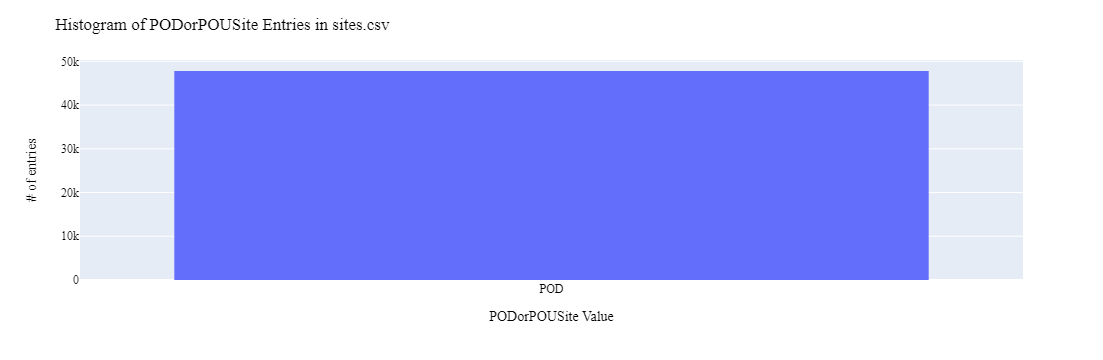

In [41]:
# ---- Histogram: Num of POD sites vs POU sites ----
print(dfstemp_ws.PODorPOUSite.value_counts())

fig = px.histogram(dfstemp_ws, x="PODorPOUSite")
fig.update_layout(bargap=0.2,
                  title="Histogram of PODorPOUSite Entries in sites.csv",
                  xaxis_title="PODorPOUSite Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PODorPOUSite.png', engine="kaleido")

In [42]:
# ---- Histogram: Num of sites via WatersourceTypeCV ----
print(dfstemp_ws.WaterSourceTypeCV.value_counts())

fig = px.histogram(dfstemp_ws, x="WaterSourceTypeCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaterSourceTypeCV Entries in sites.csv",
                  xaxis_title="WaterSourceTypeCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/WaterSourceTypeCV.png', engine="kaleido")

AttributeError: 'DataFrame' object has no attribute 'WaterSourceTypeCV'

In [ ]:
# ---- Histogram: Distribution of PrimaryBeneficialUseCategory WaDE Values ----
print(dfaa.PrimaryBeneficialUseCategory.value_counts())

fig = px.histogram(dfaa, x="PrimaryBeneficialUseCategory")
fig.update_layout(bargap=0.2,
                  title="Histogram of WaDE PrimaryBeneficialUseCategory Entries in waterallocations.csv",
                  xaxis_title="PrimaryBeneficialUseCategory Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/PrimaryBeneficialUseCategory.png', engine="kaleido")

In [ ]:
# ---- AllocationPriorityDate #1: histogram distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.histogram(dfaatemp, x="AllocationPriorityDate")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate1.png', engine="kaleido")

In [ ]:
# ---- AllocationPriorityDate #2: cumulative distribution of WaDE values 
print(dfaa.AllocationPriorityDate.value_counts())

dfaatemp = dfaa.copy()
dfaatemp = dfaatemp[(dfaatemp['ExemptOfVolumeFlowPriority'] < 1)].reset_index(drop=True)
fig = px.ecdf(dfaatemp, x="AllocationPriorityDate", ecdfnorm=None)
fig.update_layout(bargap=0.2,
                  title="Cumulative Distribution of AllocationPriorityDate Entries in waterallocations.csv",
                  xaxis_title="AllocationPriorityDate Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationPriorityDate2.png', engine="kaleido")

In [ ]:
# ---- AllocationLegalStatusCV: histogram distribution of WaDE values ----
print(dfaa.AllocationLegalStatusCV.value_counts())

fig = px.histogram(dfaa, x="AllocationLegalStatusCV")
fig.update_layout(bargap=0.2,
                  title="Histogram of AllocationLegalStatusCV Entries in waterallocations.csv",
                  xaxis_title="AllocationLegalStatusCV Value",
                  yaxis_title="# of entries",
                  #legend_title="Legend Title",
                    font=dict(
                        family="Arial Bold",
                        size=12,
                        color="Black")
                 )
fig.show()
fig.write_image('figures/AllocationLegalStatusCV.png', engine="kaleido")

In [ ]:
# ---- Map of Points sites ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] == ''].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=gpd.points_from_xy(dfstemp.Longitude.astype(float), dfstemp.Latitude.astype(float)), crs="EPSG:4326")
    gplt.pointplot(gdfstemp, hue='WaterSourceTypeCV', edgecolor='lightgray', linewidth=0.5, legend=True, legend_var='hue', ax=ax)
    mplt.savefig(format="png", fname='figures/PointMap.png') 
except:
    print('No point data to plot')

In [ ]:
# ---- Map of Polygons ----

dfstemp = dfstemp_ws.copy()
dfstemp = dfstemp[dfstemp['Geometry'] != ""].reset_index(drop=True)

try:
    contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa')) # use for background map in subplot
    ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator()) # set subplot

    dfstemp['Geometry'] = gpd.GeoSeries.from_wkt(dfstemp['Geometry'], crs="EPSG:4326")
    gdfstemp = gpd.GeoDataFrame(dfstemp, geometry=dfstemp['Geometry'], crs="EPSG:4326") # covert to geodataframe
    gplt.choropleth(gdfstemp, edgecolor='lightgray', linewidth=0.5, hue='WaterSourceTypeCV', legend=True, ax=ax)
    mplt.savefig(format="png", fname='figures/PolyMap.png')
except:
    print('No geometry data to plot')

### Allocation CFS, allocation AF, & Water Use Amount

In [ ]:
# ---- AllocationFlow_CFS: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfaa['AllocationFlow_CFS'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationFlow_CFS'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationFlow_CFS Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationFlow_CFS Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/AllocationFlow_CFS.png', engine="kaleido")

except: print('Could not plot AllocationFlow_CFS value.')

In [ ]:
# ---- AllocationVolume_AF: Boxplot distribution of WaDE values ----

try:
    trace1 = go.Violin(x=dfaa['AllocationVolume_AF'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfaa['AllocationVolume_AF'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="AllocationVolume_AF Distribution in waterallocations.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=1, col=1)
    fig.update_xaxes(title_text="AllocationVolume_AF Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/AllocationVolume_AF.png', engine="kaleido")

except: print('Could not plot AllocationVolume_AF value.')

In [ ]:
# ---- Amount: Boxplot distribution of WaDE values ----

try: 
    trace1 = go.Violin(x=dfsa['Amount'], points='outliers', name='Violin Plot')
    trace2 = go.Histogram(x=dfsa['Amount'], name='Historgram')

    fig = make_subplots(rows=2, cols=1)
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)

    fig.update_layout(showlegend=False, bargap=0.2, title="Amount Distribution in sitespecificamounts.csv", font=dict(family="Arial Bold", size=12,color="Black"))
    fig.update_xaxes(title_text="Amount Value", row=1, col=1)
    fig.update_xaxes(title_text="Amount Value", row=2, col=1)
    fig.update_yaxes(title_text="Num. of Records", row=2, col=1)
    fig.show(renderer="png")
    fig.write_image('figures/Amount.png', engine="kaleido")

except: print('Could not plot Amount value.')

# Removed Records compared to Source Data
- this is working just fine, just want to comment out temporarily for future use

In [ ]:
# # Explode purge.xlsx files by WaDEUUID, concat together
# #################################################################

# # Explode watersources_missing.xlsx records by WaDEUUID
# dfwspurgeCopy = dfwspurge.assign(WaDEUUID=dfwspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfwspurgeCopy = dfwspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode sites_missing.xlsx records by WaDEUUID
# dfspurgeCopy = dfspurge.assign(WaDEUUID=dfspurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfspurgeCopy = dfspurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # Explode waterallocations_missing.xlsx records by WaDEUUID
# dfaapurgeCopy = dfaapurge.assign(WaDEUUID=dfaapurge['WaDEUUID'].str.split(',')).explode('WaDEUUID').reset_index(drop=True)
# dfaapurgeCopy = dfaapurgeCopy[['WaDEUUID','ReasonRemoved','IncompleteField']]

# # concat purge dataframes togehter
# frames = [dfwspurgeCopy, dfspurgeCopy, dfaapurgeCopy] 
# dfWaDEUUID = pd.concat(frames)
# dfWaDEUUID = dfWaDEUUID.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
# print(len(dfWaDEUUID))
# dfWaDEUUID.head(1)

# Custom Queries and Analysis for this Dataset

In [ ]:
# N/A